In [1]:
## Імпорт бібліотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

# Встановлення seed для відтворюваності результатів
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

print("Версії бібліотек:")
print(f"TensorFlow: {tf.__version__}")
print(f"PyTorch: {torch.__version__}")

Версії бібліотек:
TensorFlow: 2.20.0
PyTorch: 2.9.1+cpu


In [2]:
## Крок 1: Завантаження та попередній аналіз даних

# Завантаження датасету Iris
df = pd.read_csv('Iris.csv')

print("\nПерші 5 рядків датасету:")
print(df.head())
print("\nІнформація про датасет:")
print(df.info())
print("\nСтатистичний опис:")
print(df.describe())
print("\nРозподіл класів:")
print(df['Species'].value_counts())

# Перевірка на пропущені значення
print("\nПропущені значення:")
print(df.isnull().sum())


Перші 5 рядків датасету:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), o

In [3]:
# Видалення колонки Id
df = df.drop('Id', axis=1)

# Розділення на ознаки та цільову змінну
X = df.drop('Species', axis=1).values
y = df['Species'].values

# Кодування міток класів
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"\nКласи: {label_encoder.classes_}")
print(f"Закодовані значення: {np.unique(y_encoded)}")

# Поділ на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nРозмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

# Нормалізація ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Класи: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Закодовані значення: [0 1 2]

Розмір навчальної вибірки: (120, 4)
Розмір тестової вибірки: (30, 4)


In [4]:
# Перетворення для TensorFlow (one-hot encoding)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
num_classes = y_train_categorical.shape[1]

# Перетворення для PyTorch
X_train_torch = torch.FloatTensor(X_train_scaled)
y_train_torch = torch.LongTensor(y_train)
X_test_torch = torch.FloatTensor(X_test_scaled)
y_test_torch = torch.LongTensor(y_test)


print("МОДЕЛЬ 1: TensorFlow/Keras")

МОДЕЛЬ 1: TensorFlow/Keras


In [5]:
## TensorFlow: Побудова нейронної мережі

tf_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

print("\nАрхітектура TensorFlow моделі:")
tf_model.summary()


Архітектура TensorFlow моделі:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,979 (11.64 KB)

 Trainable params: 2,979 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
## TensorFlow: Компіляція та навчання

tf_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=0
)

print("\nНавчання TensorFlow моделі...")
tf_history = tf_model.fit(
    X_train_scaled, y_train_categorical,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)


Навчання TensorFlow моделі...


In [7]:
## TensorFlow: Оцінка

tf_test_loss, tf_test_accuracy = tf_model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
tf_y_pred = tf_model.predict(X_test_scaled, verbose=0)
tf_y_pred_classes = np.argmax(tf_y_pred, axis=1)

print(f"\nTensorFlow - Тестова точність: {tf_test_accuracy:.4f}")
print(f"TensorFlow - Тестова функція втрат: {tf_test_loss:.4f}")


print("МОДЕЛЬ 2: PyTorch")


TensorFlow - Тестова точність: 0.9667
TensorFlow - Тестова функція втрат: 0.0987
МОДЕЛЬ 2: PyTorch


In [8]:
## PyTorch: Визначення архітектури

class IrisNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [9]:
# Створення моделі
input_size = X_train_scaled.shape[1]
pytorch_model = IrisNet(input_size, num_classes)

print("\nАрхітектура PyTorch моделі:")
print(pytorch_model)


Архітектура PyTorch моделі:
IrisNet(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
)


In [10]:
## PyTorch: Налаштування та навчання

criterion = nn.CrossEntropyLoss()
optimizer_pt = optim.Adam(pytorch_model.parameters(), lr=0.001)

# Створення DataLoader
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [11]:
# Навчання
pytorch_model.train()
epochs = 200
pytorch_history = {'loss': [], 'accuracy': []}

print("\nНавчання PyTorch моделі...")
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer_pt.zero_grad()
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_pt.step()
        
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    pytorch_history['loss'].append(epoch_loss / len(train_loader))
    pytorch_history['accuracy'].append(correct / total)
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")


Навчання PyTorch моделі...
Epoch [50/200], Loss: 0.0739, Accuracy: 0.9583
Epoch [100/200], Loss: 0.0528, Accuracy: 0.9917
Epoch [150/200], Loss: 0.0423, Accuracy: 0.9833
Epoch [200/200], Loss: 0.0258, Accuracy: 0.9917


In [12]:
## PyTorch: Оцінка

pytorch_model.eval()
with torch.no_grad():
    outputs = pytorch_model(X_test_torch)
    _, pytorch_y_pred_classes = torch.max(outputs, 1)
    pytorch_y_pred_classes = pytorch_y_pred_classes.numpy()
    
    # Обчислення точності
    pytorch_test_accuracy = accuracy_score(y_test, pytorch_y_pred_classes)
    test_loss = criterion(outputs, y_test_torch).item()

print(f"\nPyTorch - Тестова точність: {pytorch_test_accuracy:.4f}")
print(f"PyTorch - Тестова функція втрат: {test_loss:.4f}")

print("МОДЕЛЬ 3: Scikit-learn MLPClassifier")


PyTorch - Тестова точність: 0.9667
PyTorch - Тестова функція втрат: 0.1271
МОДЕЛЬ 3: Scikit-learn MLPClassifier


In [13]:
## Scikit-learn: MLPClassifier

sklearn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=False
)

print("\nНавчання Scikit-learn MLPClassifier моделі...")
sklearn_model.fit(X_train_scaled, y_train)


Навчання Scikit-learn MLPClassifier моделі...


,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [14]:
## Scikit-learn: Оцінка

sklearn_y_pred = sklearn_model.predict(X_test_scaled)
sklearn_test_accuracy = accuracy_score(y_test, sklearn_y_pred)

print(f"\nScikit-learn - Тестова точність: {sklearn_test_accuracy:.4f}")
print(f"Scikit-learn - Кількість ітерацій: {sklearn_model.n_iter_}")


Scikit-learn - Тестова точність: 0.3333
Scikit-learn - Кількість ітерацій: 12


In [15]:
## Порівняння результатів всіх моделей

print("ПОРІВНЯННЯ РЕЗУЛЬТАТІВ")

results_comparison = pd.DataFrame({
    'Модель': ['TensorFlow/Keras', 'PyTorch', 'Scikit-learn MLP'],
    'Точність': [tf_test_accuracy, pytorch_test_accuracy, sklearn_test_accuracy],
    'Особливості': [
        'Sequential API, easy to use',
        'Flexible, research-oriented',
        'Simple, sklearn integration'
    ]
})

print("\n", results_comparison.to_string(index=False))

ПОРІВНЯННЯ РЕЗУЛЬТАТІВ

           Модель  Точність                 Особливості
TensorFlow/Keras  0.966667 Sequential API, easy to use
         PyTorch  0.966667 Flexible, research-oriented
Scikit-learn MLP  0.333333 Simple, sklearn integration


In [16]:
# Детальні звіти класифікації
print("TensorFlow - Звіт класифікації:")
print(classification_report(y_test, tf_y_pred_classes, target_names=label_encoder.classes_))


print("PyTorch - Звіт класифікації:")
print(classification_report(y_test, pytorch_y_pred_classes, target_names=label_encoder.classes_))

print("Scikit-learn - Звіт класифікації:")
print(classification_report(y_test, sklearn_y_pred, target_names=label_encoder.classes_))

TensorFlow - Звіт класифікації:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

PyTorch - Звіт класифікації:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Scikit-learn - Звіт класифікації:
                 precision    recall  f1-score   support

    Iris-setosa       0.33      1.00      0

## Візуалізація результатів

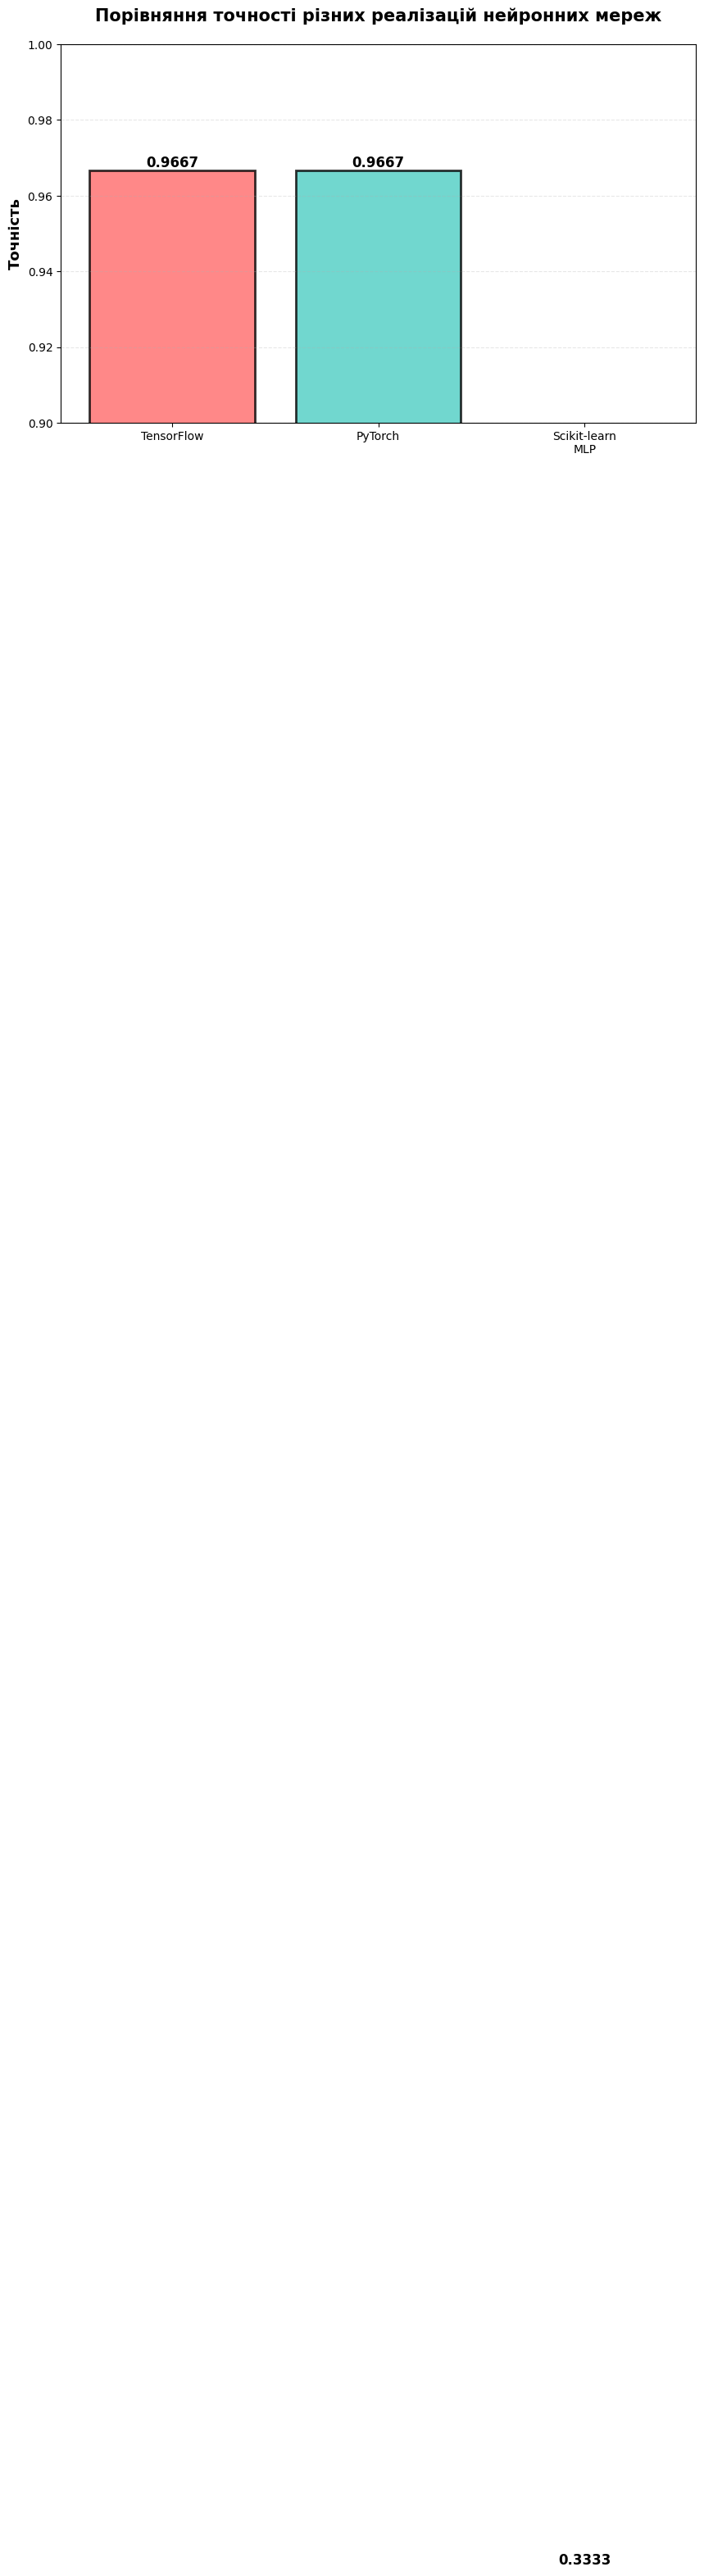

In [17]:
# 1. Порівняння точності моделей
fig, ax = plt.subplots(figsize=(10, 6))
models = ['TensorFlow', 'PyTorch', 'Scikit-learn\nMLP']
accuracies = [tf_test_accuracy, pytorch_test_accuracy, sklearn_test_accuracy]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax.set_ylabel('Точність', fontsize=13, fontweight='bold')
ax.set_title('Порівняння точності різних реалізацій нейронних мереж', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_ylim([0.9, 1.0])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Додавання значень на стовпчики
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

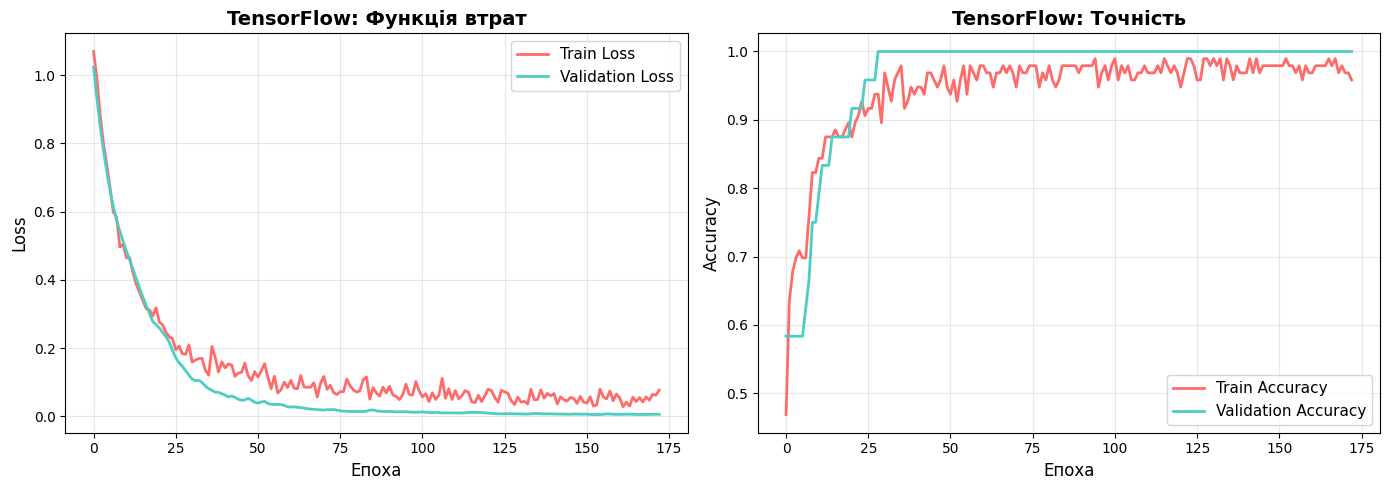

In [18]:
# 2. Графіки навчання TensorFlow
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(tf_history.history['loss'], label='Train Loss', linewidth=2, color='#FF6B6B')
axes[0].plot(tf_history.history['val_loss'], label='Validation Loss', linewidth=2, color='#4ECDC4')
axes[0].set_title('TensorFlow: Функція втрат', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Епоха', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(tf_history.history['accuracy'], label='Train Accuracy', linewidth=2, color='#FF6B6B')
axes[1].plot(tf_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='#4ECDC4')
axes[1].set_title('TensorFlow: Точність', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Епоха', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tensorflow_training.png', dpi=300, bbox_inches='tight')
plt.show()

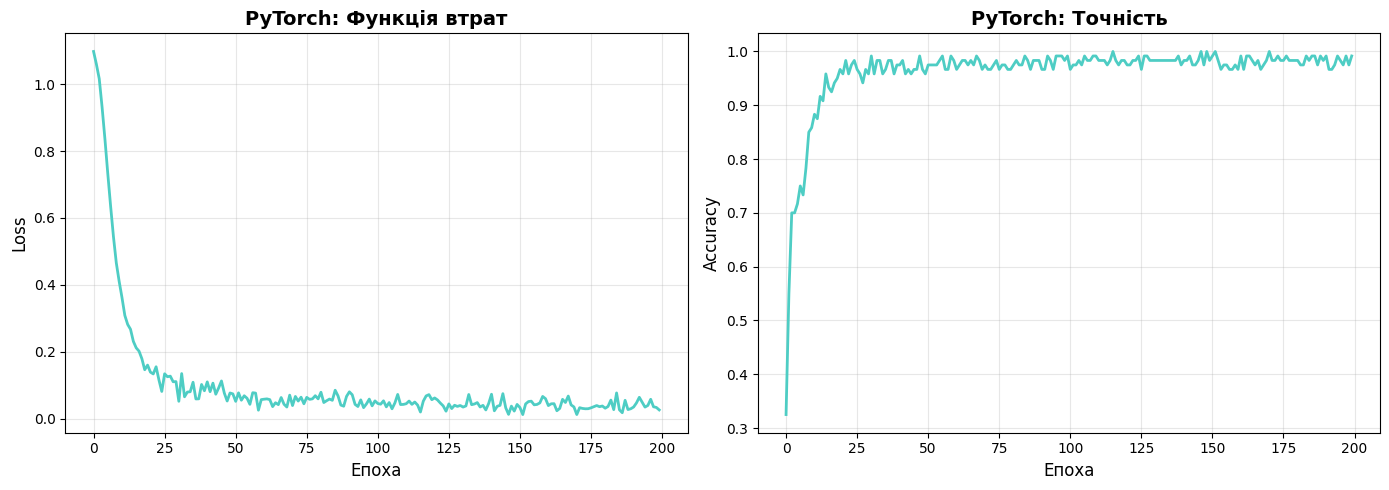

In [19]:
# 3. Графіки навчання PyTorch
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(pytorch_history['loss'], linewidth=2, color='#4ECDC4')
axes[0].set_title('PyTorch: Функція втрат', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Епоха', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].plot(pytorch_history['accuracy'], linewidth=2, color='#4ECDC4')
axes[1].set_title('PyTorch: Точність', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Епоха', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pytorch_training.png', dpi=300, bbox_inches='tight')
plt.show()

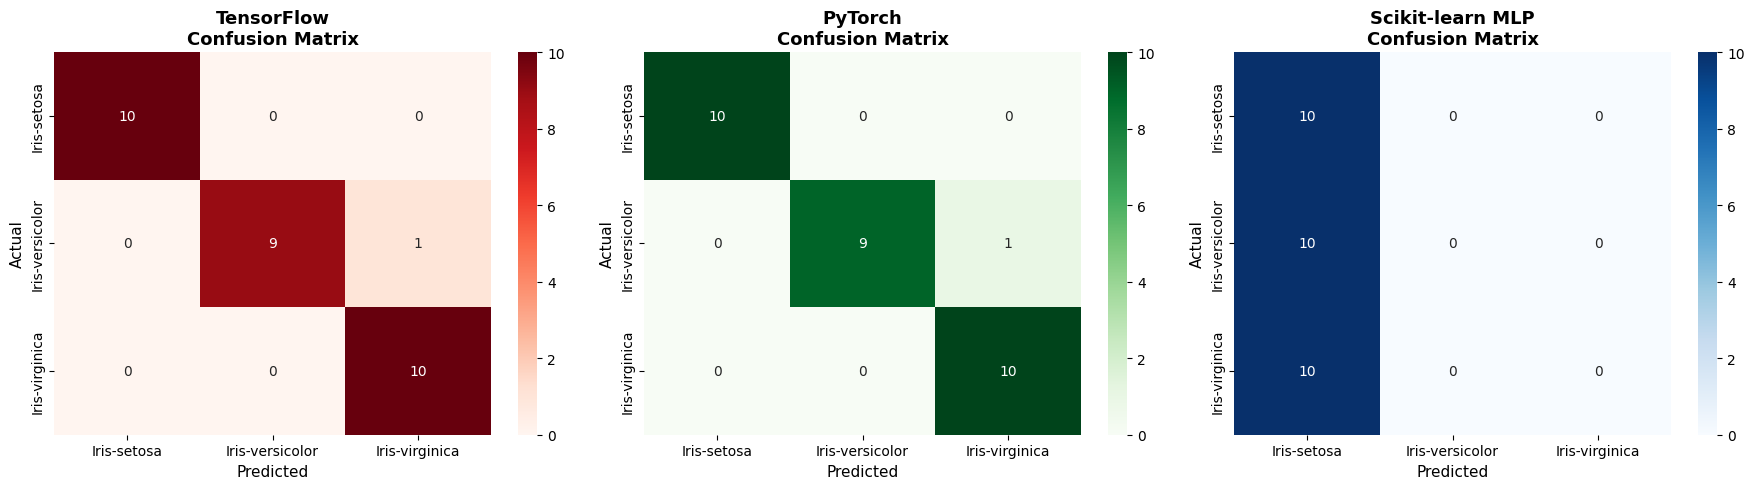

In [20]:
# 4. Матриці плутанини для всіх моделей
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TensorFlow
cm_tf = confusion_matrix(y_test, tf_y_pred_classes)
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Reds', ax=axes[0],
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
axes[0].set_title('TensorFlow\nConfusion Matrix', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('Actual', fontsize=11)

# PyTorch
cm_pt = confusion_matrix(y_test, pytorch_y_pred_classes)
sns.heatmap(cm_pt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
axes[1].set_title('PyTorch\nConfusion Matrix', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('Actual', fontsize=11)

# Scikit-learn
cm_sk = confusion_matrix(y_test, sklearn_y_pred)
sns.heatmap(cm_sk, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
axes[2].set_title('Scikit-learn MLP\nConfusion Matrix', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Predicted', fontsize=11)
axes[2].set_ylabel('Actual', fontsize=11)

plt.tight_layout()
plt.savefig('confusion_matrices_all.png', dpi=300, bbox_inches='tight')
plt.show()

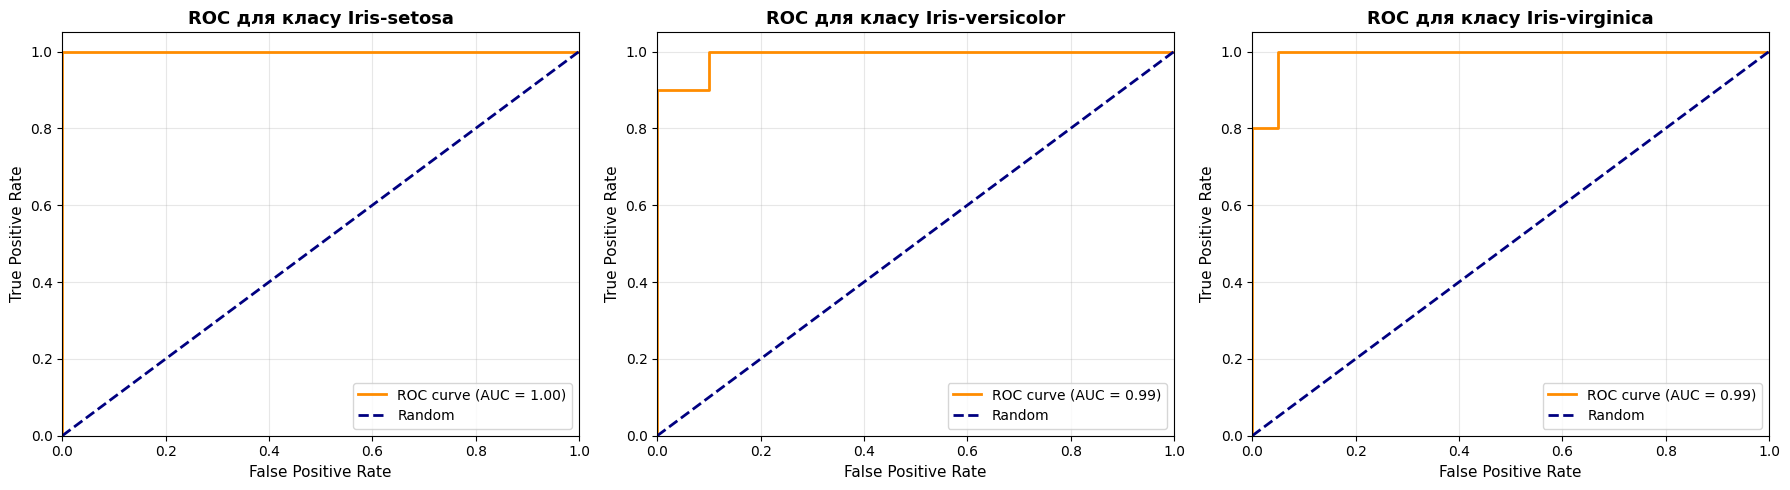

In [21]:
# 5. ROC-криві (для TensorFlow моделі)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_categorical[:, i], tf_y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate', fontsize=11)
    axes[i].set_ylabel('True Positive Rate', fontsize=11)
    axes[i].set_title(f'ROC для класу {label_encoder.classes_[i]}', 
                     fontsize=13, fontweight='bold')
    axes[i].legend(loc="lower right", fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
## Збереження моделей

tf_model.save('iris_tensorflow_model.h5')
torch.save(pytorch_model.state_dict(), 'iris_pytorch_model.pth')
print("\n✓ Моделі збережено:")
print("  - iris_tensorflow_model.h5")
print("  - iris_pytorch_model.pth")


✓ Моделі збережено:
  - iris_tensorflow_model.h5
  - iris_pytorch_model.pth
